<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import time
from tqdm import tqdm

In [3]:
data = pd.read_csv('/datasets/Churn.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Пропуски</b>    
</p>
</div>

In [7]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
В столбце "Tenure — сколько лет человек является клиентом банка" есть пропуски. Причина может быть, что человек является клиентом банка менее года. Заменим пропуски 0 и переведем значения столбца в целочисленный тип. 
</p>
</div>

In [8]:
data['Tenure']=data['Tenure'].fillna(0).astype('int64')

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Названия столбцов</b>    
</p>
</div>

In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Приведем к стандартному виду названия столбцов.    
</p>
</div>

In [10]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Дубликаты</b>    
</p>
</div>

In [11]:
data.duplicated().sum()

0

In [12]:
data['customerid'].duplicated().sum()

0

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Проверили данные на наличие дубоикатов. Дубликатов в данных не обнаружено.    
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Лишние признаки</b>    
</p>
</div>

In [13]:
data.drop(columns='rownumber', inplace=True)
data.drop(columns='customerid', inplace=True)
data.drop(columns='surname', inplace=True)

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Удалили лишние признаки-столбцы: 'rownumber', 'customerid', 'surname'.      
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Выбросы</b>
</p>
</div>

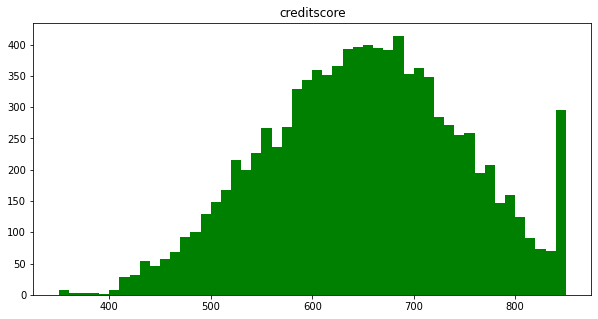

In [14]:
data.hist(column='creditscore', bins=50, color='green',grid=False, figsize=(10, 5))
plt.show()

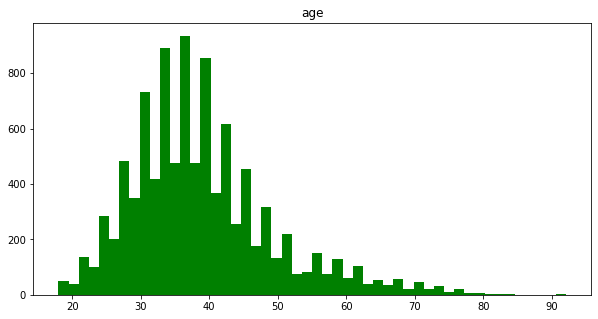

In [15]:
data.hist(column='age', bins=50, color='green',grid=False, figsize=(10, 5))
plt.show()

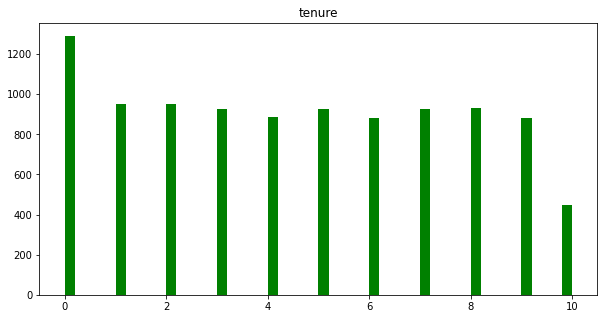

In [16]:
data.hist(column='tenure', bins=50, color='green',grid=False, figsize=(10, 5))
plt.show()

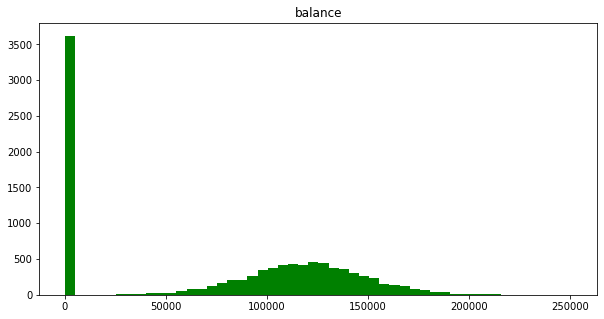

In [17]:
data.hist(column='balance', bins=50, color='green',grid=False, figsize=(10, 5))
plt.show()

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
В столбце 'balance' есть всплеск, напоминающий выброс около нуля. Но в контексте данной задачи, когда мы исследуем отток лиентов из банка, наличие нулевого баланса (столбец 'balance') нельзя считать вбросом. В остальных столбцах вбросов также не обнанужено.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Мультиколлинеарность</b>    
</p>
</div>

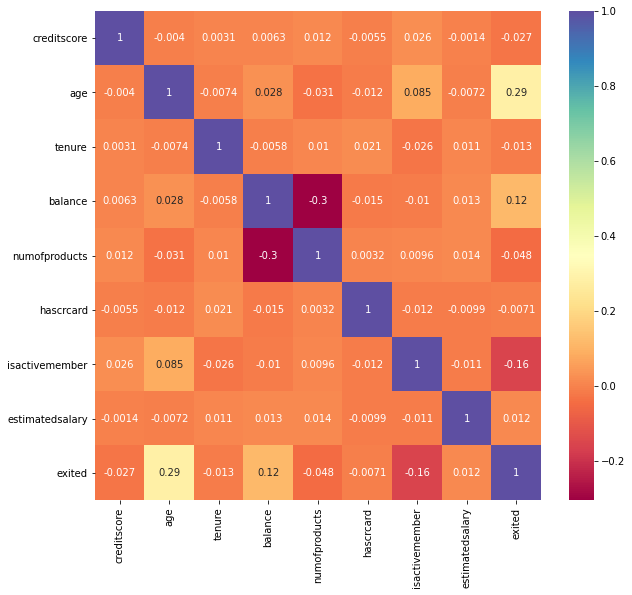

In [18]:
plt.figure(figsize = (10,9))
df_plot = sns.heatmap(data.corr(), cmap="Spectral", annot=True)       
plt.show()

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Проверим распределение данных и проверим данные на мультиколлинеарность, чтобы выделить значимые переменные. Признаки никак не коррелируют между собой. Явления мультиколлинеарности в данных не обнанужено.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Кодирование данных</b>
</p>
</div>

In [19]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
data1 = pd.get_dummies(data,drop_first=True)
data1.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
data1.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'geography_Germany',
       'geography_Spain', 'gender_Male'],
      dtype='object')

In [23]:
data1 = data1.rename(
    columns={'geography_Germany':'geography_germany', 'geography_Spain':'geography_spain', 'gender_Male':'gender_male'})

In [24]:
data1.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Вывод:</b><br>
Произведена подготовка двнных для построения модели и исследования. Обработаны пропуски. Произведена замена названий столбцов.
Выполнена проверка данных на дубликаты. Дубликатов не обнаружено. Удалили лишние признаки-столбцы: 'rownumber', 'customerid', 
'surname'. Выполнена проверка даннх на выбросы. Выбросов не обнаружено. 
Выполнена проверка данных на мультиколлинеарность. Явления мультиколлинеарности в данных не обнанужено. 
Произвели кодирование данных и избавились от категориальных признаков методом One hot encoder (OHE).
</p>
</div>

## Исследование задачи

In [25]:
target = data1['exited']
features = data1.drop('exited', axis=1)

In [26]:
features_train, features_valid, target_train,target_valid = \
train_test_split(features, target, test_size=0.4, random_state=12345)

In [27]:
features_valid, features_test, target_valid, target_test = \
train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)

In [28]:
features_train.shape

(6000, 11)

In [29]:
features_valid.shape

(2000, 11)

In [30]:
features_test.shape

(2000, 11)

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>    
Разобили исходные данные на три выборки: обучающую, валидационную и тестовую. Выделили 60 % данных на обучающую выборку, и по 20 % на валидационную и тестовую выборки. Получили три набора данных df_train для обучения модели, df_valid для поверки модели на переобучение, df_test для оценки качества и точности модели.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Дисбаланс</b>    
</p>
</div>

In [31]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

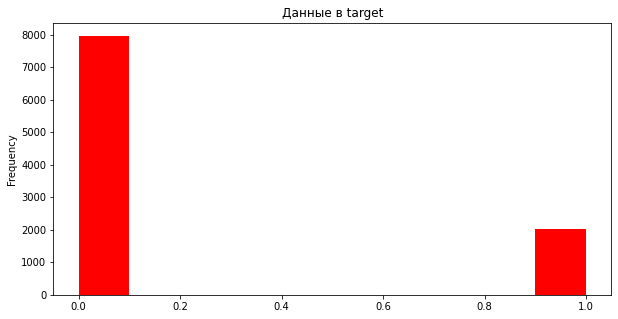

In [31]:
target.plot(kind='hist', color='red',grid=False, figsize=(10, 5))
plt.title('Данные в target')
plt.show()

In [32]:
freq_0_1 = data['exited'].value_counts(normalize=True)
freq_0_1

0    0.7963
1    0.2037
Name: exited, dtype: float64

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Проверим, как часто в целевом признаке нашего исходного набора данных встречается класс "1" или "0". <br> 
Соотношение несбалансировано: 0 ~80% и 1 ~20%. <br> 
На первом этапе исследуем модели без учета дисбаланса классов.     
</p>
</div>    

In [33]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
7479,567,35,8,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2,147435.96,1,0,0,187508.06,1,0,0


In [34]:
features_train.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'geography_germany',
       'geography_spain', 'gender_male'],
      dtype='object')

In [35]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

In [36]:
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [37]:
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
7479,-0.886751,-0.373192,1.104696,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,1,0,0,1.524268,1,0,0


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Logistic Regression</b>    
</p>
</div>

In [38]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [39]:
print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.23684210526315788
Точность: 0.5657142857142857
AUC-ROC: 0.5944008250715284
F1-мера: 0.33389544688026984


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Decision Tree Classifier</b>    
</p>
</div>

In [40]:
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) 
    print("F1-мера:", f1_score(target_valid, predicted_valid), depth)        

F1-мера: 0.0 1
F1-мера: 0.5217391304347825 2
F1-мера: 0.4234875444839857 3
F1-мера: 0.5528700906344411 4
F1-мера: 0.5406249999999999 5
F1-мера: 0.5696969696969697 6
F1-мера: 0.5320813771517998 7
F1-мера: 0.5449010654490106 8
F1-мера: 0.5786516853932585 9
F1-мера: 0.528995756718529 10
F1-мера: 0.5201072386058981 11
F1-мера: 0.5013054830287207 12
F1-мера: 0.5259067357512954 13
F1-мера: 0.48391248391248387 14
F1-мера: 0.5025125628140703 15
F1-мера: 0.491183879093199 16
F1-мера: 0.47160493827160493 17
F1-мера: 0.49014778325123154 18
F1-мера: 0.4921212121212121 19


In [41]:
model = DecisionTreeClassifier(max_depth=9, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))   

Полнота: 0.49282296650717705
Точность: 0.7006802721088435
AUC-ROC: 0.7185985881840563
F1-мера: 0.5786516853932585


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Decision Tree Classifier лучшее значение F1-мера равно 0.5786516853932585 для глубины дерева равной 9.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Random Forest Classifier</b>    
</p>
</div>

In [42]:
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 20, 1):
    for depth in range (1, 20, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)   
        model.fit(features_train,target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid) 
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
        
print("Best Model: F1-мера:", best_result, best_depth, best_est) 

Best Model: F1-мера: 0.5985185185185184 13 9


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.5985185185185184 для глубины дерева равной 13 и параметру estimators равному 9.
</p>
</div>

In [43]:
model = RandomForestClassifier(random_state=12345, n_estimators=9, max_depth=13)   
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid)) 

Полнота: 0.48325358851674644
Точность: 0.7859922178988327
AUC-ROC: 0.7242437348399156
F1-мера: 0.5985185185185184


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Вывод:</b><br/>
Разобили исходные данные на три выборки: обучающую, валидационную и тестовую. Выделили 60 % данных на обучающую выборку, и по 20 % на валидационную и тестовую выборки. Получили три набора данных df_train для обучения модели, df_valid для поверки модели на переобучение, df_test для оценки качества и точности модели. <br>    
Проверили, как часто в целевом признаке нашего исходного набора данных встречается класс "1" или "0". <br> 
Соотношение несбалансировано: 0 ~80% и 1 ~20%. Разница в 4 раза. <br> 
На первом этапе исследовали модели без учета дисбаланса классов. 
Получили следующие результаты: <br/>    
Logistic Regression: <br>
Значения метрик. <br>
Полнота: 0.49282296650717705 <br>
Точность: 0.7006802721088435 <br>
AUC-ROC: 0.7185985881840563 <br>
F1-мера: 0.5786516853932585 <br>    
Decision Tree Classifier:<br>
Для модели Decision Tree Classifier лучшее значение F1-мера равно 0.5786516853932585 для глубины дерева равной 9. <br>    
Значения метрик. <br>
Полнота: 0.49282296650717705 <br>
Точность: 0.7006802721088435 <br>
AUC-ROC: 0.7185985881840563 <br>
F1-мера: 0.5786516853932585 <br>
Random Forest Classifier:<br>  
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.5985185185185184 для глубины дерева равной 13 и параметру estimators равному 9. <br>     
Значения метрик. <br> 
Полнота: 0.48325358851674644 <br>
Точность: 0.7859922178988327 <br>
AUC-ROC: 0.7242437348399156 <br>
F1-мера: 0.5985185185185184 <br>   
</p>
</div>

## Борьба с дисбалансом

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Метод upsampling</b>    
</p>
</div>

In [92]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Проверка: снизился ли дисбаланс</b>    
</p>
</div>

In [142]:
target_upsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: exited, dtype: float64

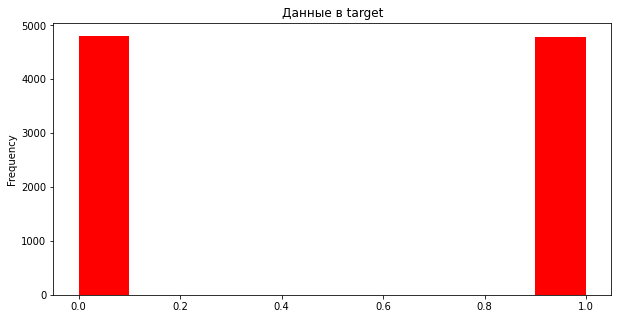

In [143]:
target_upsampled.plot(kind='hist', color='red',grid=False, figsize=(10, 5))
plt.title('Данные в target')
plt.show()

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Logistic Regression</b>    
</p>
</div>

In [45]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

In [46]:
print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.6842105263157895
Точность: 0.3803191489361702
AUC-ROC: 0.6948233415396898
F1-мера: 0.4888888888888888


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Decision Tree Classifier</b>    
</p>
</div>

In [47]:
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid) 
    print("F1-мера:", f1_score(target_valid, predicted_valid), depth)        

F1-мера: 0.4994903160040775 1
F1-мера: 0.541015625 2
F1-мера: 0.541015625 3
F1-мера: 0.5277777777777778 4
F1-мера: 0.5963791267305644 5
F1-мера: 0.5581835383159887 6
F1-мера: 0.5571142284569138 7
F1-мера: 0.5386875612144956 8
F1-мера: 0.5304518664047152 9
F1-мера: 0.5223300970873788 10
F1-мера: 0.5269582909460834 11
F1-мера: 0.5047120418848168 12
F1-мера: 0.50989010989011 13
F1-мера: 0.4943052391799545 14
F1-мера: 0.48428405122235163 15
F1-мера: 0.48527679623085984 16
F1-мера: 0.46803377563329307 17
F1-мера: 0.4741275571600481 18
F1-мера: 0.4560975609756098 19


In [48]:
model = DecisionTreeClassifier(max_depth=5, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 

print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))   

Полнота: 0.6698564593301436
Точность: 0.5374280230326296
AUC-ROC: 0.7587588238496482
F1-мера: 0.5963791267305644


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Decision Tree Classifier лучшее значение F1-мера равно 0.5963791267305644 для глубины дерева равной 5. Значения оптимального параметра глубина дерева для лучшей модели отличается для моделей без учета дисбаланса и с учетом дисбаланса. 
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Random Forest Classifier</b>    
</p>
</div>

In [185]:
best_result = 0
best_est = 0
best_depth = 0
data_result = pd.DataFrame(columns=['depth', 'est', 'F1'])

with tqdm(total=380) as pbar:
    for est in range(100, 200, 5):
        for depth in range (1, 20, 1):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)   
            model.fit(features_upsampled, target_upsampled)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            new_row = pd.Series(data={'depth': depth, 'est': est, 'F1': result})
            data_result = data_result.append(new_row,ignore_index=True)
            pbar.update(1)
            if result > best_result:
                best_result = result
                best_est = est
                best_depth = depth
        
print("Best Model: F1-мера:", best_result, best_depth, best_est) 

100%|██████████| 380/380 [06:45<00:00,  1.07s/it]

Best Model: F1-мера: 0.6362545018007203 13 135


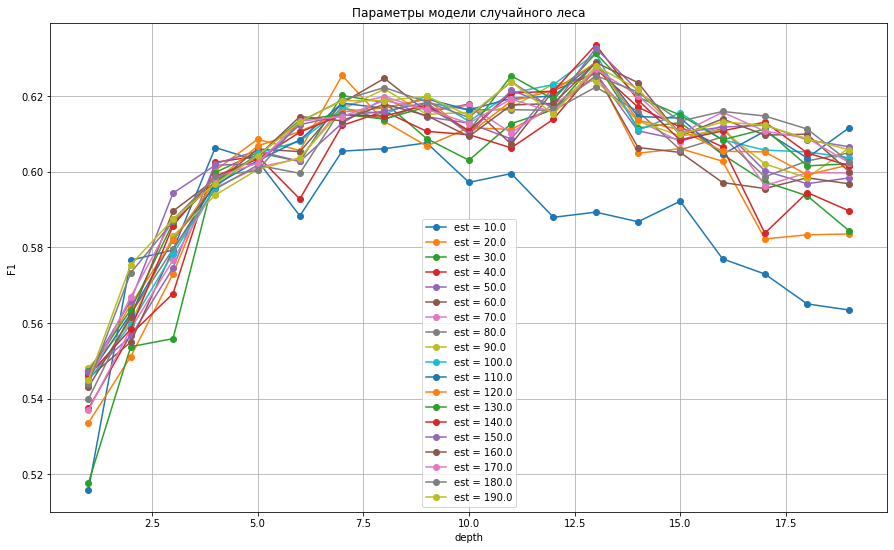

In [173]:
fig, ax = plt.subplots()
for i in data_result['est'].unique():
    data_result[data_result['est'] == i].plot(x = 'depth', y = 'F1', ax=ax, style='o-', \
                                             grid=True, figsize=(15, 9), legend=True, label='est = %s'%i)
plt.title('Параметры модели случайного леса')
plt.ylabel('F1')
plt.show()

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
График показывает как зависит величина F1-меры от параметров модели случайного леса. Из графика мы видим, что F1-мера принимает максимальную величину для глубины дерева равной 13 и параметру estimators равному 135. До глубины дерева равной 13 величина F1-меры растет, затем начинает уменьшаться.     
</p>
</div>

In [174]:
model = RandomForestClassifier(random_state=12345, n_estimators=140, max_depth=13)   
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 

print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid)) 

Полнота: 0.6267942583732058
Точность: 0.6405867970660146
AUC-ROC: 0.7669369521954524
F1-мера: 0.6336154776299879


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.6362545018007203 для глубины дерева равной 13 и параметру estimators равному 135. Значение F1-меры улучшилось по сравнению 
с результатом обучения модели без учета дисбаланса. Параметры лучшей модели глубины дерева и estimators изменились по сравнению с моделью без учета дисбаланса. Таким образом, учет дисбаланса при построении модели влияет на выбор оптимальных параметров модели.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Метод downsampling</b>    
</p>
</div>

In [118]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Проверка: снизился ли дисбаланс</b>    
</p>
</div>

In [140]:
target_downsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: exited, dtype: float64

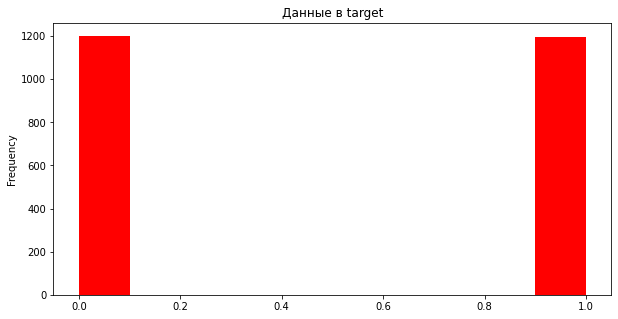

In [141]:
target_downsampled.plot(kind='hist', color='red',grid=False, figsize=(10, 5))
plt.title('Данные в target')
plt.show()

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Logistic Regression</b>    
</p>
</div>

In [121]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

In [122]:
print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.6794258373205742
Точность: 0.33849821215733017
AUC-ROC: 0.6643020463467599
F1-мера: 0.45186953062848056


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Decision Tree Classifier</b>    
</p>
</div>

In [123]:
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid) 
    print("F1-мера:", f1_score(target_valid, predicted_valid), depth)  

F1-мера: 0.5061845861084681 1
F1-мера: 0.5394495412844036 2
F1-мера: 0.5555555555555556 3
F1-мера: 0.5357737104825291 4
F1-мера: 0.5931174089068827 5
F1-мера: 0.5738636363636362 6
F1-мера: 0.5290437890974085 7
F1-мера: 0.5291396854764107 8
F1-мера: 0.5360443622920518 9
F1-мера: 0.521901211556384 10
F1-мера: 0.5067873303167421 11
F1-мера: 0.49517120280948196 12
F1-мера: 0.48542024013722135 13
F1-мера: 0.48653198653198654 14
F1-мера: 0.4970111016225449 15
F1-мера: 0.48438818565400843 16
F1-мера: 0.4894514767932489 17
F1-мера: 0.49031171019376585 18
F1-мера: 0.49072512647554806 19


In [186]:
model = DecisionTreeClassifier(max_depth=6, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid) 

print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.7248803827751196
Точность: 0.47492163009404387
AUC-ROC: 0.7565615567478632
F1-мера: 0.5738636363636362


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Decision Tree Classifier лучшее значение F1-мера равно 0.5738636363636362 для глубины дерева равной 6.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Random Forest Classifier</b>    
</p>
</div>

In [157]:
best_result = 0
best_est = 0
best_depth = 0
data_result = pd.DataFrame(columns=['depth', 'est', 'F1'])

with tqdm(total=361) as pbar:
    for est in range(10, 200, 10):
        for depth in range (1, 20, 1):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)   
            model.fit(features_downsampled, target_downsampled)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            new_row = pd.Series(data={'depth': depth, 'est': est, 'F1': result})
            data_result = data_result.append(new_row,ignore_index=True)
            pbar.update(1)
            if result > best_result:
                best_result = result
                best_est = est
                best_depth = depth
        
print("Best Model: F1-мера:", best_result, best_depth, best_est) 

100%|██████████| 361/361 [01:47<00:00,  3.37it/s]

Best Model: F1-мера: 0.6036217303822937 4 10


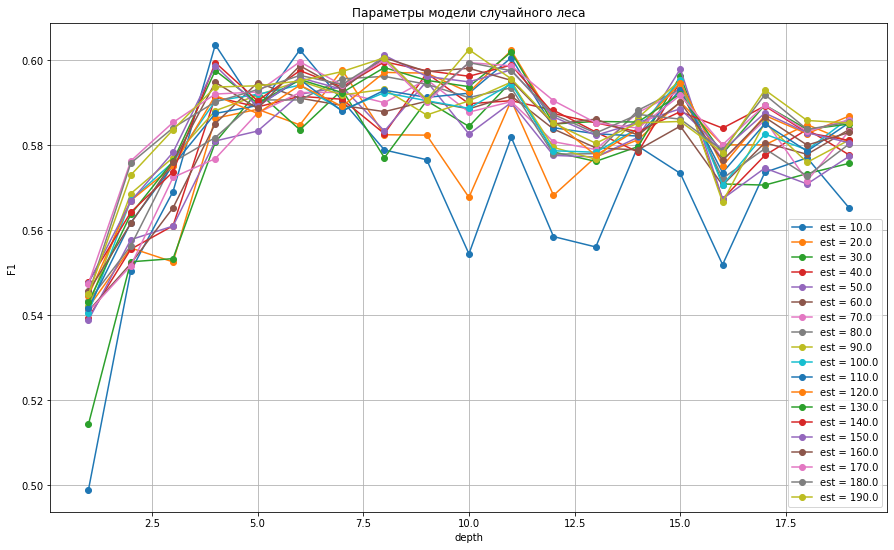

In [158]:
fig, ax = plt.subplots()
for i in data_result['est'].unique():
    data_result[data_result['est'] == i].plot(x = 'depth', y = 'F1', ax=ax, style='o-', \
                                             grid=True, figsize=(15, 9), legend=True, label='est = %s'%i)
plt.title('Параметры модели случайного леса')
plt.ylabel('F1')
plt.show()

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
График показывает как зависит величина F1-меры от параметров модели случайного леса. Из графика мы видим, что F1-мера принимает максимальную величину для глубины дерева равной 4 и параметру estimators равному 10. До глубины дерева равной 4 величина F1-меры растет, затем начинает уменьшаться.     
</p>
</div>

In [164]:
model = RandomForestClassifier(random_state=12345, n_estimators=10, max_depth=4)   
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)  

In [165]:
print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.7177033492822966
Точность: 0.5208333333333334
AUC-ROC: 0.77162032192307
F1-мера: 0.6036217303822937


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.6036217303822937 для глубины дерева равной 4 и параметру estimators равному 10. Значение F1-меры улучшилось при использовании метода downsample по сравнению
с результатом обучения модели без учета дисбаланса.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Балансировка весов классов</b>    
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Logistic Regression</b>    
</p>
</div>

In [166]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [167]:
print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.6722488038277512
Точность: 0.33978234582829503
AUC-ROC: 0.6635580302324597
F1-мера: 0.4514056224899599


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Вывод:</b><br>
Для модели LogisticRegression Метод upsampling и метод Балансировка весов классов дают абсолютно одинаковый результат для всех 
метрик: <br>    
Полнота: 0.6842105263157895 <br>
Точность: 0.3803191489361702 <br>
AUC-ROC: 0.6948233415396898 <br>
F1-мера: 0.4888888888888888 <br>  
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Decision Tree Classifier</b>    
</p>
</div>

In [168]:
for depth in range(1, 20, 1):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) 
    print("F1-мера:", f1_score(target_valid, predicted_valid), depth)

F1-мера: 0.4994903160040775 1
F1-мера: 0.541015625 2
F1-мера: 0.541015625 3
F1-мера: 0.5277777777777778 4
F1-мера: 0.5963791267305644 5
F1-мера: 0.5581835383159887 6
F1-мера: 0.5559999999999999 7
F1-мера: 0.5401174168297456 8
F1-мера: 0.5338567222767419 9
F1-мера: 0.5163776493256262 10
F1-мера: 0.5316973415132925 11
F1-мера: 0.5097636176772867 12
F1-мера: 0.49891067538126366 13
F1-мера: 0.4845132743362832 14
F1-мера: 0.47410817031070196 15
F1-мера: 0.4739336492890996 16
F1-мера: 0.4786729857819906 17
F1-мера: 0.4710144927536232 18
F1-мера: 0.4556354916067146 19


In [169]:
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid) 

print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.6698564593301436
Точность: 0.5374280230326296
AUC-ROC: 0.7587588238496482
F1-мера: 0.5963791267305644


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Decision Tree Classifier лучшее значение F1-мера равно 0.5963791267305644 для глубины дерева равной 5.
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Random Forest Classifier</b>    
</p>
</div>

In [175]:
best_result = 0
best_est = 0
best_depth = 0
data_result = pd.DataFrame(columns=['depth', 'est', 'F1'])

with tqdm(total=361) as pbar:
    for est in range(10, 200, 10):
        for depth in range (1, 20, 1):
            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')   
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            new_row = pd.Series(data={'depth': depth, 'est': est, 'F1': result})
            data_result = data_result.append(new_row,ignore_index=True)
            pbar.update(1)
            if result > best_result:
                best_result = result
                best_est = est
                best_depth = depth
        
print("Best Model: F1-мера:", best_result, best_depth, best_est) 

100%|██████████| 551/551 [07:25<00:00,  1.24it/s]

Best Model: F1-мера: 0.6354285714285716 9 190


In [176]:
model = RandomForestClassifier(random_state=12345, n_estimators=190, max_depth=9, class_weight='balanced')   
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)  

In [177]:
print("Полнота:" , recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))

Полнота: 0.6650717703349283
Точность: 0.6083150984682714
AUC-ROC: 0.7759619281510293
F1-мера: 0.6354285714285716


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.6354285714285716 для глубины дерева равной 9 и параметру estimators равному 190. Значение F1-меры улучшилось по сравнению 
с результатом обучения модели без учета дисбаланса. 
</p>
</div>

<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Вывод:</b> <br>
Лучшая модель: Random Forest Classifier.     
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.6362545018007203 для глубины дерева равной 13 и 
параметру estimators равному 135.  
Значение F1-меры улучшилось по сравнению 
с результатом обучения модели без учета дисбаланса. Метод upsample дает лучший показать F1-меры по сравнению 
с методом downsample и методом балансировки весов классов: значение F1-меры увеличилось на 0.3 и на 0.01 соответственно при тестировании на валидационной выборке.
</p>
</div>

## Тестирование модели

In [183]:
model = RandomForestClassifier(random_state=12345, n_estimators=135, max_depth=13)   
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test) 

In [184]:
print("Полнота:" , recall_score(target_test, predicted_test))
print("Точность:", precision_score(target_test, predicted_test))
print("AUC-ROC:", roc_auc_score(target_test, predicted_test))
print("F1-мера:", f1_score(target_test, predicted_test))

Полнота: 0.5981087470449172
Точность: 0.6216216216216216
AUC-ROC: 0.7502274870291169
F1-мера: 0.6096385542168674


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Вывод:</b> <br>
Для лучшей модели Random Forest Classifier проведено тестированое на тестовой выборке. Результат: F1-мера = 0.6096385542168674. 
Удалось достичь F1-меры не менее 0.59 согласно заданию проекта.    
</p>
</div>

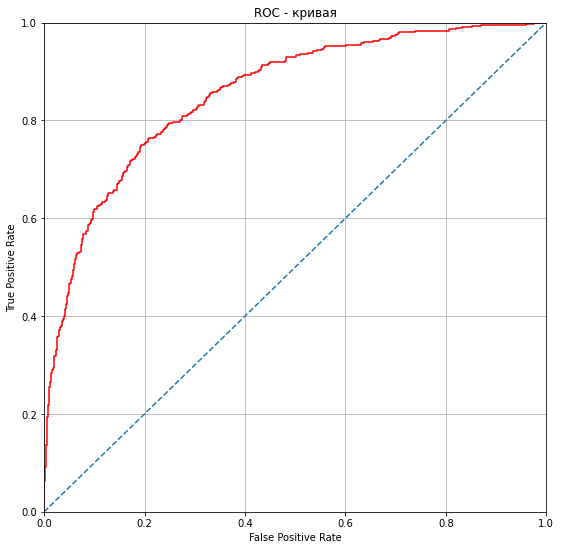

In [181]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Построим ROC - кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(9,9))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.plot(fpr, tpr,  color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [182]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8547351031599335


<div style="background-color: WhiteSmoke; border-left: 7px solid Silver">
<p>
<b>Общий вывод:</b><br> 
Произведена подготовка двнных для построения модели и исследования. Обработаны пропуски. Произведена замена названий столбцов.
Выполнена проверка данных на дубликаты. Дубликатов не обнаружено. Удалили лишние признаки-столбцы: 'rownumber', 'customerid', 
'surname'. Выполнена проверка даннх на выбросы. Выбросов не обнаружено. 
Выполнена проверка данных на мультиколлинеарность. Явления мультиколлинеарности в данных не обнанужено. 
Произвели кодирование данных и избавились от категориальных признаков методом One hot encoder (OHE). <br> 
Разобили исходные данные на три выборки: обучающую, валидационную и тестовую. Выделили 60 % данных на обучающую выборку, и по 20 % на валидационную и тестовую выборки. Получили три набора данных df_train для обучения модели, df_valid для поверки модели на переобучение, df_test для оценки качества и точности модели.
Проверили, как часто в целевом признаке нашего исходного набора данных встречается класс "1" или "0".
Соотношение несбалансировано: 0 ~80% и 1 ~20%. Разница в 4 раза. <br>   
    
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.6370023419203746 для глубины дерева равной 13 и параметру estimators равному 135. Значение F1-меры улучшилось по сравнению 
с результатом обучения модели без учета дисбаланса. Параметры лучшей модели глубины дерева и estimators изменились по сравнению с моделью без учета дисбаланса. Таким образом, учет дисбаланса при построении модели влияет на выбор оптимальных параметров модели. <br>
    
Проанализированы модели LogisticRegression, DecisionTreeClassifier, RandomForestClassifier. <br>
    
Лучшая модель: Random Forest Classifier.     
Для модели Random Forest Classifier лучшее значение F1-мера равно 0.6370023419203746 для глубины дерева равной 13 и 
параметру estimators равному 135.  
Значение F1-меры улучшилось по сравнению 
с результатом обучения модели без учета дисбаланса. Метод upsample дает лучший показать F1-меры по сравнению 
с методом downsample: значение F1-меры увеличилось на 0.3 при тестировании на валидационной выборке. <br>
    
Для лучшей модели Random Forest Classifier проведено тестированое на тестовой выборке. Результат: F1-мера = 0.6096385542168674. Удалось достичь F1-меры не менее 0.59 согласно заданию проекта. <br>
    
Построена ROC - кривая, и измерена AUC-ROC = 0.8547351031599335.  
</p>
</div>